In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import datetime
import matplotlib.dates as mdates


In [31]:
policy = 'LL'
logs1 = []
logs2 = []
logs3 = []
with open(f'YACS/worker/log_worker_1_{policy}.log') as f1, open(f'YACS/worker/log_worker_2_{policy}.log') as f2, open(f'YACS/worker/log_worker_3_{policy}.log') as f3:
    logs1 = f1.readlines()
    logs2 = f2.readlines()
    logs3 = f3.readlines()


In [40]:
logs1

['2020-12-06 22:39:40,138 %number of tasks running=% 0 %tasks completed=%0\n',
 '2020-12-06 22:39:41,151 %number of tasks running=% 0 %tasks completed=%0\n',
 '2020-12-06 22:39:41,807 %TASK RECEIVED%{"task_id": "0_M0", "duration": 3, "status": 1}\n',
 '2020-12-06 22:39:41,924 %TASK RECEIVED%{"task_id": "0_M1", "duration": 4, "status": 1}\n',
 '2020-12-06 22:39:42,162 %number of tasks running=% 0 %tasks completed=%0\n',
 '2020-12-06 22:39:43,177 %number of tasks running=% 2 %tasks completed=%0\n',
 '2020-12-06 22:39:43,788 %TASK RECEIVED%{"task_id": "2_M0", "duration": 4, "status": 1}\n',
 '2020-12-06 22:39:43,991 %TASK RECEIVED%{"task_id": "2_M2", "duration": 2, "status": 1}\n',
 '2020-12-06 22:39:44,187 %number of tasks running=% 2 %tasks completed=%0\n',
 '2020-12-06 22:39:44,212 %TASK RECEIVED%{"task_id": "3_M0", "duration": 1, "status": 1}\n',
 "2020-12-06 22:39:45,196 %TASK COMPLETED%{'task_id': '0_M0', 'duration': 0, 'status': 2}\n",
 '2020-12-06 22:39:45,196 %number of tasks run

In [37]:
job_received_log = []
job_completed_log = []

In [38]:
for logs in [logs1, logs2, logs3]:
    for log in logs:
        log = log.split('%')
        log[0] = log[0].strip()
        if log[1] == 'TASK RECEIVED':
            job_received_log.append(log)
        elif log[1] == 'TASK COMPLETED':
            job_completed_log.append(log)

In [39]:
job_completed_log

[['2020-12-06 22:39:45,196',
  'TASK COMPLETED',
  "{'task_id': '0_M0', 'duration': 0, 'status': 2}\n"],
 ['2020-12-06 22:39:46,207',
  'TASK COMPLETED',
  "{'task_id': '0_M1', 'duration': 0, 'status': 2}\n"],
 ['2020-12-06 22:39:46,207',
  'TASK COMPLETED',
  "{'task_id': '2_M2', 'duration': 0, 'status': 2}\n"],
 ['2020-12-06 22:39:46,231',
  'TASK COMPLETED',
  "{'task_id': '3_M0', 'duration': 0, 'status': 2}\n"],
 ['2020-12-06 22:39:47,253',
  'TASK COMPLETED',
  "{'task_id': '0_R0', 'duration': 0, 'status': 2}\n"],
 ['2020-12-06 22:39:48,262',
  'TASK COMPLETED',
  "{'task_id': '2_M0', 'duration': 0, 'status': 2}\n"],
 ['2020-12-06 22:39:48,268',
  'TASK COMPLETED',
  "{'task_id': '1_R1', 'duration': 0, 'status': 2}\n"],
 ['2020-12-06 22:39:49,276',
  'TASK COMPLETED',
  "{'task_id': '5_M3', 'duration': 0, 'status': 2}\n"],
 ['2020-12-06 22:39:50,291',
  'TASK COMPLETED',
  "{'task_id': '3_R0', 'duration': 0, 'status': 2}\n"],
 ['2020-12-06 22:39:50,298',
  'TASK COMPLETED',
  "{'t

In [41]:
for i in job_received_log:
    i[2] = json.loads(i[2])['task_id']    
for i in job_completed_log:
    #i[2] = json.loads(i[2])['task_id']    
    i[2] = i[2].split(',')[0].split(':')[1].strip()  

In [42]:
print(job_received_log[1])
print(job_completed_log[1])

['2020-12-06 22:39:41,924', 'TASK RECEIVED', '0_M1']
['2020-12-06 22:39:46,207', 'TASK COMPLETED', "'0_M1'"]


In [43]:
def convert_to_datetime(datetime_string):
    k = datetime.datetime.strptime(datetime_string, '%Y-%m-%d %H:%M:%S,%f')
    return k

In [44]:
job_times = {}
for i in job_received_log:
    for j in job_completed_log:
        if i[2] == j[2][1:-1]:
            job_times[i[2]] = (convert_to_datetime(j[0]) - convert_to_datetime(i[0])).total_seconds()

In [45]:
len(job_times)

49

In [46]:
sorted_times = sorted(list(job_times.values()))
avg_times[policy] = sum(list(job_times.values()))/len(sorted_times)
mid = len(sorted_times) // 2
median_times[policy] = (sorted_times[mid] + sorted_times[~mid])/2

In [47]:
avg_times

{'RD': 3.217139240506328, 'RR': 3.123240506329113, 'LL': 3.304775510204081}

In [48]:
median_times

{'RD': 3.417, 'RR': 3.197, 'LL': 3.389}

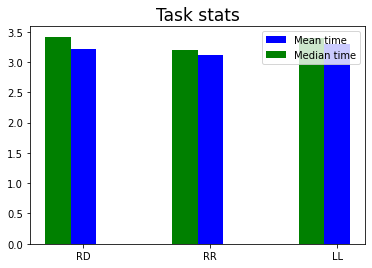

In [51]:
X = np.arange(len(avg_times))
ax = plt.subplot(111)
ax.bar(X, avg_times.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, median_times.values(), width=0.2, color='g', align='center')
ax.legend(('Mean time','Median time'))
plt.xticks(X, avg_times.keys())
plt.title("Task stats", fontsize=17)
plt.savefig('Task stats')
plt.show()

In [162]:
ts_tasks_1 = {}
ts_tasks_2 = {}
ts_tasks_3 = {}
ct = 0
for log in logs1:
    log = log.split('%')
    log[0] = log[0].strip()
    if log[1] == 'TASK RECEIVED':
        ct += 1
    elif log[1] == 'TASK COMPLETED':
        ct -= 1
    ts_tasks_1[convert_to_datetime(log[0])] = ct
    
for log in logs2:
    log = log.split('%')
    log[0] = log[0].strip()
    if log[1] == 'TASK RECEIVED':
        ct += 1
    elif log[1] == 'TASK COMPLETED':
        ct -= 1
    ts_tasks_2[convert_to_datetime(log[0])] = ct

for log in logs3:
    log = log.split('%')
    log[0] = log[0].strip()
    if log[1] == 'TASK RECEIVED':
        ct += 1
    elif log[1] == 'TASK COMPLETED':
        ct -= 1
    ts_tasks_3[convert_to_datetime(log[0])] = ct

In [163]:
ts_tasks_1

{datetime.datetime(2020, 12, 6, 22, 28, 47, 198000): 0,
 datetime.datetime(2020, 12, 6, 22, 28, 48, 214000): 0,
 datetime.datetime(2020, 12, 6, 22, 28, 49, 231000): 0,
 datetime.datetime(2020, 12, 6, 22, 28, 50, 243000): 0,
 datetime.datetime(2020, 12, 6, 22, 28, 50, 591000): 1,
 datetime.datetime(2020, 12, 6, 22, 28, 51, 260000): 1,
 datetime.datetime(2020, 12, 6, 22, 28, 52, 274000): 1,
 datetime.datetime(2020, 12, 6, 22, 28, 53, 287000): 1,
 datetime.datetime(2020, 12, 6, 22, 28, 53, 679000): 2,
 datetime.datetime(2020, 12, 6, 22, 28, 54, 297000): 1,
 datetime.datetime(2020, 12, 6, 22, 28, 54, 303000): 1,
 datetime.datetime(2020, 12, 6, 22, 28, 54, 304000): 1,
 datetime.datetime(2020, 12, 6, 22, 28, 55, 233000): 2,
 datetime.datetime(2020, 12, 6, 22, 28, 55, 250000): 3,
 datetime.datetime(2020, 12, 6, 22, 28, 55, 263000): 4,
 datetime.datetime(2020, 12, 6, 22, 28, 55, 310000): 4,
 datetime.datetime(2020, 12, 6, 22, 28, 56, 320000): 3,
 datetime.datetime(2020, 12, 6, 22, 28, 56, 3270

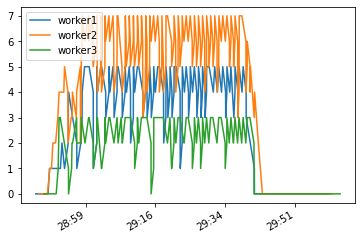

In [164]:
dates1 = matplotlib.dates.date2num(list(ts_tasks_1.keys()))
dates2 = matplotlib.dates.date2num(list(ts_tasks_2.keys()))
dates3 = matplotlib.dates.date2num(list(ts_tasks_3.keys()))
fig, ax = plt.subplots(1)
fig.autofmt_xdate()
plt.plot(dates1, list(ts_tasks_1.values()), label = 'worker1')
plt.plot(dates2, list(ts_tasks_2.values()), label = 'worker2')
plt.plot(dates3, list(ts_tasks_3.values()), label = 'worker3')
plt.legend(loc="upper left")
xfmt = mdates.DateFormatter('%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.savefig(f'{policy}_50_worker_task_spread.png')

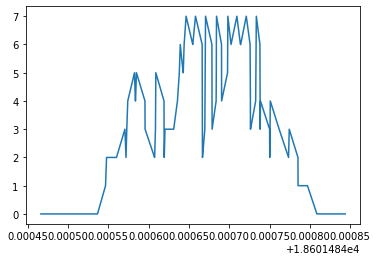

In [42]:
plt.plot(dates2, list(ts_tasks_2.values()))

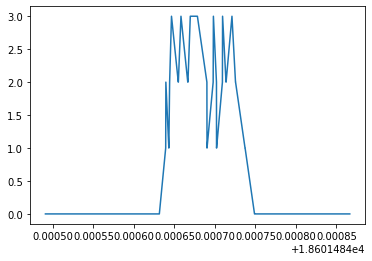

In [43]:
plt.plot(dates3, list(ts_tasks_3.values()))